In this file I perform:
* Granger causality test
* SVR performance test

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('../datasets/full_clean.csv', parse_dates=['date_'])

In [5]:
df.columns

Index(['date_', 'ticker', 'open', 'high', 'low', 'close', 'vol', 'max_comp',
       'max_neg', 'max_neu', 'max_pos', 'min_comp', 'min_neg', 'min_neu',
       'min_pos', 'std_comp', 'std_neg', 'std_neu', 'std_pos', 'mean_comp',
       'mean_neg', 'mean_neu', 'mean_pos', 'median_comp', 'median_neg',
       'median_neu', 'median_pos', 'count'],
      dtype='object')

### AMZN

In [8]:
amzn = df[df['ticker'] == 'AMZN'].copy()
amzn['diffs'] = amzn.close.pct_change() * 100
# drop 1 NaN value
amzn = amzn.dropna()

<AxesSubplot:>

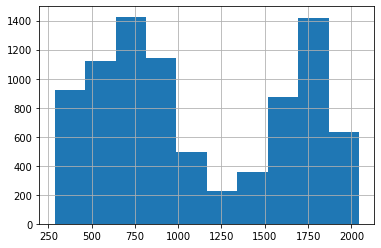

In [42]:
amzn.close.hist()

<AxesSubplot:xlabel='diffs', ylabel='Count'>

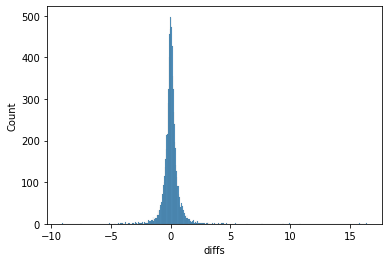

In [9]:
sns.histplot(amzn, x='diffs')

In [25]:
amzn.diffs.describe(percentiles=[0.025, 0.975])

count    8613.000000
mean        0.022990
std         0.697298
min        -9.063159
2.5%       -1.189902
50%         0.013113
97.5%       1.245116
max        16.392219
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.19% to 1.25%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

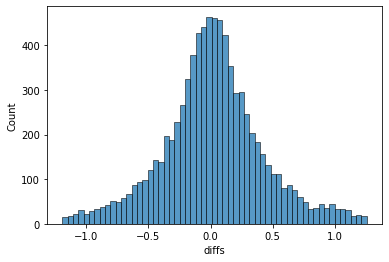

In [26]:
diffs_no_outliers = amzn[(amzn['diffs']>-1.20) & (amzn['diffs']<1.26)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

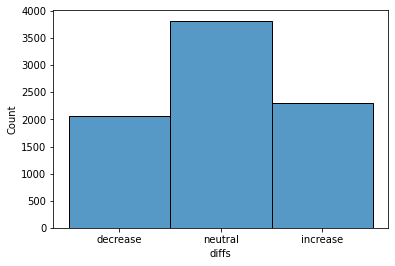

In [40]:
# amzn distribution for 3 bins without outliers
x = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.2, 0.2, 100], labels=['decrease', 'neutral', 'increase'])
sns.histplot(x)

<AxesSubplot:xlabel='diffs', ylabel='Count'>

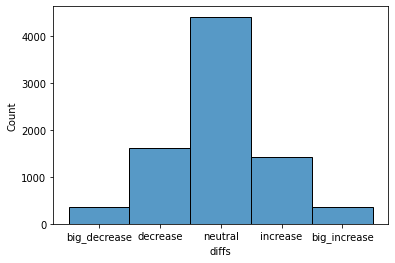

In [30]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [31]:
print(bins_5)

[-1.19725684 -0.70411374 -0.21342409  0.27726556  0.76795521  1.25864486]


In [32]:
diff_in_len = len(amzn)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(amzn)*100, 2))

425 4.93


In [36]:
amzn['bin_2'] = pd.cut(amzn.diffs, bins=[-100, 0, 100], labels=['decrease', 'increase'])
amzn['bin_3'] = pd.cut(amzn.diffs, bins=[-100, -2, 2, 100], labels=['decrease', 'neutral', 'increase'])
amzn['bin_5'] = pd.cut(amzn.diffs, bins=bins_5, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'])

<AxesSubplot:xlabel='bin_5', ylabel='Count'>

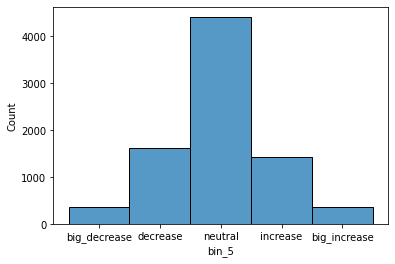

In [37]:
sns.histplot(data=amzn, x='bin_5')

In [91]:
amzn.bin_5.value_counts(normalize=True)

neutral         0.383722
increase        0.240567
decrease        0.215024
big_increase    0.081969
big_decrease    0.078718
Name: bin_5, dtype: float64

In [92]:
amzn.to_csv('../datasets/data_binned.csv', index=False)